In [1]:
import pandas as pd

In [2]:
array1 = pd.read_excel("CountyFair.xlsx")

In [3]:
array1.info()
ds = array1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 5 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   Card No.                                                                           95 non-null     object
 1   Here I am in the year 2050, and I want to tell you why Arlington is so fantastic…  95 non-null     object
 2   Translation (when applicable)                                                      6 non-null      object
 3   Getting here wasn't easy, but it was worth it! Here is how we did it:              57 non-null     object
 4   Translation (when applicable).1                                                    1 non-null      object
dtypes: object(5)
memory usage: 3.8+ KB


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 5 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   Card No.                                                                           95 non-null     object
 1   Here I am in the year 2050, and I want to tell you why Arlington is so fantastic…  95 non-null     object
 2   Translation (when applicable)                                                      6 non-null      object
 3   Getting here wasn't easy, but it was worth it! Here is how we did it:              57 non-null     object
 4   Translation (when applicable).1                                                    1 non-null      object
dtypes: object(5)
memory usage: 3.8+ KB


In [5]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [7]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

string_list = ds['Here I am in the year 2050, and I want to tell you why Arlington is so fantastic…'].tolist()
spanish_list = ds['Translation (when applicable)'].tolist()
IndexCounter = 0
for n in spanish_list: # Gets non null values from the spanish translated list, if they're not null then it appends to the corresponding index of the main list.
    workingstring = str(n)
    if workingstring != 'nan':
        string_list[IndexCounter] = workingstring
    IndexCounter += 1


In [13]:
%%bash
python3 -m pip install pyspellchecker

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 16.2 MB/s eta 0:00:00a 0:00:01



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


In [14]:
%%capture
%run ./load_concatenated_text.ipynb

Exception: File `'./load_concatenated_text.ipynb'` not found.

In [22]:
from spellchecker import SpellChecker
spell = SpellChecker()
spell.word_frequency.load_words([
    'Arlington'
    , 'Glebe'
    , 'Ballston'
    , 'Rosslyn'
    , 'Pershing'
    , 'Rockville'
    , 'MD'
    , 'VA'
    , 'Maryland'
    , 'Virginia'
    , 'Bluemont'
    , 'Wilson'
    ])

# Function to spell-check text. We'll use apply() to run this function on every record
def spell_check(text):
    doc = nlp(text)  # Process the text with spaCy
    corrected_words = []
    
    # Find misspelled words
    misspelled = spell.unknown([token.text for token in doc if not token.is_punct and not token.is_stop])

    for token in doc:
        if not token.is_punct and not token.is_stop and len(token.text.strip()) > 0:  # Exclude punctuation and stop words
            word = token.text.strip()
            if word.lower() in misspelled:
                correction = spell.correction(word)
                if (correction is not None) and (correction.lower() != word.lower()):
                    corrected_words.append(correction)
                    #Uncomment this line to review the list of words that are correcting
                    #print(f"Correcting {word} => {correction}")
                else:
                   corrected_words.append(word.lower())
            else:
                corrected_words.append(word)  # Preserve correct words

    if len(corrected_words)>0:
        return " ".join(corrected_words)
    else: 
        return ""
    
for item in string_list:
    spell_check(item)
print(corrected_words)

NameError: name 'ds_all_postcards' is not defined

In [8]:
pol_list = []
sub_list = []
t = 0
for t in range(2,len(string_list)):
    text = string_list[t]
    doc = nlp(text)
    pol_list.append(doc._.blob.polarity)
    sub_list.append(doc._.blob.subjectivity)

In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

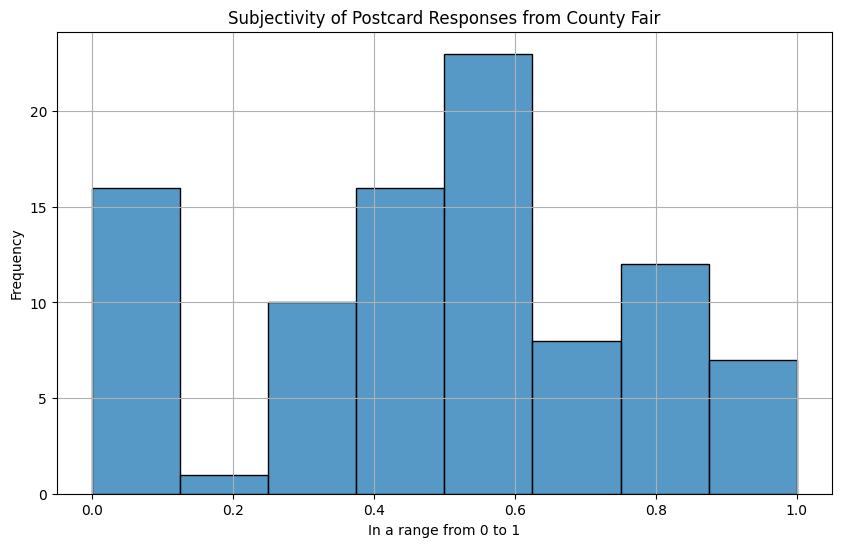

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=sub_list)
plt.title('Subjectivity of Postcard Responses from County Fair')
plt.xlabel('In a range from 0 to 1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

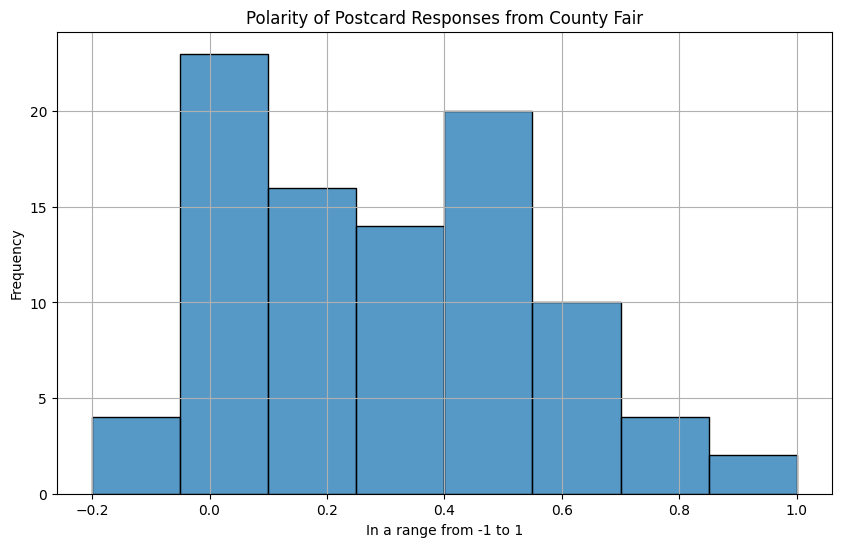

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=pol_list)
plt.title('Polarity of Postcard Responses from County Fair')
plt.xlabel('In a range from -1 to 1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()